In [1]:
# importing libraries
import pandas            as pd                       # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                   # tree plots
import random as rand # random number generation
import pandas as pd # data science essentials
import numpy as np
import gender_guesser.detector as gender # guess gender based on (given) name
from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer              # customizable scorer
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm


# setting random seed
rand.seed(a = 327)


# loading data
file ='./GOT_character_predictions.xlsx'

got= pd.read_excel(io= file)



# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# displaying the head of the dataset
got.head(n = 5)

S.No                  name                 title   culture  dateOfBirth              mother            father                heir           house               spouse  book1_A_Game_Of_Thrones  book2_A_Clash_Of_Kings  book3_A_Storm_Of_Swords  book4_A_Feast_For_Crows  book5_A_Dance_with_Dragons  isAliveMother  isAliveFather  isAliveHeir  isAliveSpouse  isMarried  isNoble   age  numDeadRelations  popularity  isAlive
0     1  Viserys II Targaryen                   NaN       NaN          NaN  Rhaenyra Targaryen  Daemon Targaryen  Aegon IV Targaryen             NaN                  NaN                        0                       0                        0                        0                           0            1.0            0.0          0.0            NaN          0        0   NaN                11    0.605351        0
1     2           Walder Frey  Lord of the Crossing  Rivermen        208.0                 NaN               NaN                 NaN      House Frey          Perra Royce                        1                       1                        1                        1                           1            NaN            NaN          NaN            1.0          1        1  97.0                 1    0.896321        1
2     3          Addison Hill                   Ser       NaN          NaN                 NaN               NaN                 NaN     House Swyft                  NaN                        0                       0                        0                        1                           0            NaN            NaN          NaN            NaN          0        1   NaN                 0    0.267559        1
3     4           Aemma Arryn                 Queen       NaN         82.0                 NaN               NaN                 NaN     House Arryn  Viserys I Targaryen                        0                       0                        0                        0                           0            NaN            NaN          NaN            0.0          1        1  23.0                 0    0.183946        0
4     5        Sylva Santagar            Greenstone   Dornish        276.0                 NaN               NaN                 NaN  House Santagar      Eldon Estermont                        0                       0                        0                        1                           0            NaN            NaN          NaN            1.0          1        1  29.0                 0    0.043478        1

In [2]:
#looking at the data frame structure.
got.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   S.No                        1946 non-null   int64  
 1   name                        1946 non-null   object 
 2   title                       938 non-null    object 
 3   culture                     677 non-null    object 
 4   dateOfBirth                 433 non-null    float64
 5   mother                      21 non-null     object 
 6   father                      26 non-null     object 
 7   heir                        23 non-null     object 
 8   house                       1519 non-null   object 
 9   spouse                      276 non-null    object 
 10  book1_A_Game_Of_Thrones     1946 non-null   int64  
 11  book2_A_Clash_Of_Kings      1946 non-null   int64  
 12  book3_A_Storm_Of_Swords     1946 non-null   int64  
 13  book4_A_Feast_For_Crows     1946 

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

# Missing Values 

## Flagging Missing values in Data.

In [3]:
#Checking for missing values at any of the features
got.isnull().sum()

S.No                             0
name                             0
title                         1008
culture                       1269
dateOfBirth                   1513
mother                        1925
father                        1920
heir                          1923
house                          427
spouse                        1670
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveMother                 1925
isAliveFather                 1920
isAliveHeir                   1923
isAliveSpouse                 1670
isMarried                        0
isNoble                          0
age                           1513
numDeadRelations                 0
popularity                       0
isAlive                          0
dtype: int64

In [4]:
#To understand the Mising values percentage per feature
print(got.isnull().mean(axis=0).round(decimals=2))


S.No                          0.00
name                          0.00
title                         0.52
culture                       0.65
dateOfBirth                   0.78
mother                        0.99
father                        0.99
heir                          0.99
house                         0.22
spouse                        0.86
book1_A_Game_Of_Thrones       0.00
book2_A_Clash_Of_Kings        0.00
book3_A_Storm_Of_Swords       0.00
book4_A_Feast_For_Crows       0.00
book5_A_Dance_with_Dragons    0.00
isAliveMother                 0.99
isAliveFather                 0.99
isAliveHeir                   0.99
isAliveSpouse                 0.86
isMarried                     0.00
isNoble                       0.00
age                           0.78
numDeadRelations              0.00
popularity                    0.00
isAlive                       0.00
dtype: float64


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
As we can see from the previous information, many columns contain high number of
missing values, there are missing values take more than 50% of the data for the specific
column with missing values , and in some cases almost 99% of the data is missing for a given column.

Treating missing values as a first step:

I will create mv flags for the missing values. As I pregress in my analysis I will be able to modify variables I find of interest 



**STRATEGY FOR MISSING VALUES**
   First:
   All Categorical features missing values will be imputed with 'unknown'

**title**         - (categorical) drop (very dirty; insufficient domain knowledge)

**culture**        - (categorical) drop (very dirty; insufficient domain knowledge)

**mother**         - (categorical) drop (very dirty; insufficient domain knowledge)

**father**         - (categorical) drop (very dirty; insufficient domain knowledge)

**heir**           - (categorical) drop (very dirty; insufficient domain knowledge)

**house**          - (categorical) Engineer - group by powerful houses  

**spouse**         - (categorical) drop (very dirty; insufficient domain knowledge)

**isAliveMother**  - (discrete) drop (very dirty; insufficient domain knowledge)

**isAliveFather**  - (discrete) drop (very dirty; insufficient domain knowledge)

**isAliveHeir**    - (discrete) drop (very dirty; insufficient domain knowledge)

**isAliveSpouse**  - (discrete) drop (very dirty; insufficient domain knowledge)

**age**            -  (continuous) Engineer, impute missing values.  

**dateOfBirth**     - (continuous) drop. Highly correlated with Age.
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

In [5]:
# user-defined functions

#########################
# mv_flagger
#########################
def mv_flagger(df):
    """
Flags all columns that have missing values with 'm-COLUMN_NAME'.

PARAMETERS
----------
df : DataFrame to flag missing values


RETURNS
-------
DataFrame with missing value flags."""


    for col in df:

        if df[col].isnull().astype(int).sum() > 0:
            df['m_'+col] = df[col].isnull().astype(int)
            
    return df

In [6]:
# running the mv_flagger function
got = mv_flagger(df=got)


# checking results
got.columns

Index(['S.No', 'name', 'title', 'culture', 'dateOfBirth', 'mother', 'father', 'heir', 'house', 'spouse', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity', 'isAlive', 'm_title', 'm_culture', 'm_dateOfBirth', 'm_mother', 'm_father', 'm_heir', 'm_house', 'm_spouse', 'm_isAliveMother', 'm_isAliveFather', 'm_isAliveHeir', 'm_isAliveSpouse', 'm_age'], dtype='object')

In [7]:
#Looking at the data with all mv flags
#got.info()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

# Feature Engineering  for continuous Features

## Age


In [8]:
#Missing value total
got['age'].isnull().sum()

1513

In [9]:
#Central tendency measurements for Age
got['age'].describe()

count       433.000000
mean      -1293.563510
std       19564.340993
min     -298001.000000
25%          18.000000
50%          27.000000
75%          50.000000
max         100.000000
Name: age, dtype: float64

In [10]:
#Applying value counts to have a better understanding of the data available
got['age'].value_counts()

 100.0       29
 19.0        19
 22.0        16
 21.0        15
 20.0        14
 23.0        14
 18.0        14
 15.0        13
 16.0        13
 24.0        10
 12.0         9
 45.0         9
 17.0         9
 56.0         8
 9.0          8
 13.0         8
 28.0         7
 14.0         7
 11.0         7
 39.0         7
 10.0         7
 41.0         7
 42.0         7
 26.0         6
 32.0         6
 25.0         6
 27.0         6
 35.0         6
 6.0          6
 36.0         5
 49.0         5
 60.0         5
 38.0         5
 37.0         5
 65.0         4
 34.0         4
 29.0         4
 69.0         4
 55.0         4
 30.0         4
 31.0         4
 54.0         4
 68.0         4
 48.0         4
 50.0         4
 66.0         4
 46.0         4
 47.0         3
 77.0         3
 40.0         3
 64.0         3
 52.0         3
 53.0         3
 58.0         3
 43.0         3
 81.0         2
 70.0         2
 51.0         2
 8.0          2
 5.0          2
 76.0         2
 79.0         2
 0.0    

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
After going over describe() and value counts, it is evident that age has 2 observations with highly negatively values that don't correspond to a possible age. Visualize to understand.

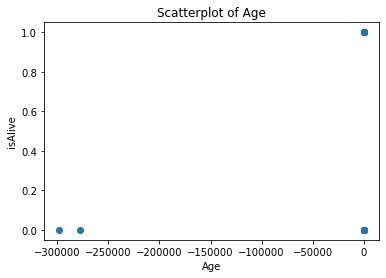

In [11]:
# developing a scatterplot
plt.scatter(x    = 'age',
                y    = 'isAlive',
                data = got)


# titles and axis labels
plt.title(label   = 'Scatterplot of Age')
plt.xlabel(xlabel = 'Age')
plt.ylabel(ylabel = 'isAlive')


# displaying the plot
plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
After evaluating plot we can see strange behavior of the data points, the scatter shows the two observations as outliers. These extreme values affect my imputing process so I will locate them by slicing the column for ages <0. 

In [12]:
#Slicing to find out these two data points with a very negative high number

got.loc[:,:][got.loc[:,'age']<0]

S.No    name title culture  dateOfBirth mother father heir            house spouse  book1_A_Game_Of_Thrones  book2_A_Clash_Of_Kings  book3_A_Storm_Of_Swords  book4_A_Feast_For_Crows  book5_A_Dance_with_Dragons  isAliveMother  isAliveFather  isAliveHeir  isAliveSpouse  isMarried  isNoble       age  numDeadRelations  popularity  isAlive  m_title  m_culture  m_dateOfBirth  m_mother  m_father  m_heir  m_house  m_spouse  m_isAliveMother  m_isAliveFather  m_isAliveHeir  m_isAliveSpouse  m_age
1684  1685  Doreah   NaN  Lysene     278279.0    NaN    NaN  NaN  House Targaryen    NaN                        1                       1                        0                        0                           1            NaN            NaN          NaN            NaN          0        0 -277980.0                 0    0.110368        0        1          0              0         1         1       1        0         1                1                1              1                1      0
1868  1869  Rhaego   NaN     NaN     298299.0    NaN    NaN  NaN  House Targaryen    NaN                        1                       1                        1                        1                           0            NaN            NaN          NaN            NaN          0        0 -298001.0                 6    0.167224        0        1          1              0         1         1       1        0         1                1                1              1                1      0

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
Obs 1684, 1868 have negative ages. Outliers will be left and missing values will be imputed with the 50% percentile. As removing data could result in damaging the accuracy and representation of the truth of the data. Note as well that dateOfBirth for these 2 observations have also values related to the negative age,  this could mean that characters are not born yet.

In [13]:
#replacing missing values with median 
miss_age= got['age'].median()

got.loc[:,'age'].fillna(value=miss_age , inplace=True)

#double check missing values where replaced
got.loc[:,'age'].isnull().sum(axis=0)

0

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
**Since Date of Birth is so highly correlated to Age, I decided NOT to use this
feature and therefore I wont apply any feature engineering and wont use it in my model** 

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

## NumDeadRelations

I will turn the number of dead relatives to a boolean feature, after that we'll turn to dummy assigning 1 if the character has dead relatives (any number) and 0 if it does not have dead relatives.

Dead relatives could tell us if this character's relatives or close people are being chased, most looked for and therefore higher chances of character being dead. 

In [14]:
#Fisrt turn into Boolean

got['numDeadRelations'] = got['numDeadRelations'].astype('bool')


#Turn options into dummy to only have binary option

got['numDeadRelations_True']= pd.get_dummies(got['numDeadRelations'], drop_first=True)

#got['numDeadRelations_True'].value_counts()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

# Feature Engineering for Categorical Features


## Filling NaN with 'unknown'



In [15]:
#missing value flags to remember where are the missing values using flags names
got.iloc[:,-14:].isnull().sum()


m_title                  0
m_culture                0
m_dateOfBirth            0
m_mother                 0
m_father                 0
m_heir                   0
m_house                  0
m_spouse                 0
m_isAliveMother          0
m_isAliveFather          0
m_isAliveHeir            0
m_isAliveSpouse          0
m_age                    0
numDeadRelations_True    0
dtype: int64

In [16]:
#create the list of features to be imputed with unkown
categorical =['title','culture', 'mother', 'father', 'heir','spouse', 'dateOfBirth', \
             'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse']      

#create a loop to automatically fill in the missing values of the features selected 

for col in got[categorical]:
    if got[col].isnull().astype(int).sum()>0:
        got[col] = got[col].fillna('unknown')


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

## Gender guesser and Hot Encoding

Since there are many observations with number of names > 2 then I will split the name
so that it will only consider the First name, as this is the one I'll be using for gender guess. In this case I will split position [0].

Gender is an important Feature to predict whether the character is alive or not. Since males are more likely to die in the battles as they represent the majority of the battle participants.

In [17]:
# STEP 1: splitting names to have first name in a single column

# placeholder list
placeholder_lst = []

# looping over each name, iterrow is the form when there are multiple indexes
for index, col in got.iterrows():
    
    # splitting name at ' ' spaces and only spliting at the first position 
    split_name = got.loc[index, 'name'].split(sep = ' ')[0]
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_name)
    

# converting placeholder_lst into a DataFrame 
name_df = pd.DataFrame(placeholder_lst)


# displaying the results
got['first_name']= name_df

In [18]:
#Checking if the FULL name is exactly repeated, as we see there are some first names repeated.
got['name'].duplicated().any()

False

There are no Full names repeated, so we have no duplicate observations in our original data set. 
Now using the gender. Detector we predict the gender corresponding to each name.


**Marked down to ease the running time of the code, results where hard coded**

In [19]:
# guessing gender based on (given) name

# placeholder list
#placeholder_lst=[]


# looping to guess gender
#for name in got['first_name']:
    #guess = gender.Detector().get_gender(name)
    #print(guess)
    #placeholder_lst.append(guess)


# converting list into a series
#got['gender_guess'] = pd.Series(placeholder_lst)


# checking results
#got.loc[:, ['name', 'first_name', "gender_guess"]]

In [20]:
#Loop to facilitate hard coding of gender guesser column

#for val in got['gender_guess']:
#    print(f"""'{val}'""", end = ', ')

In [21]:
#Gender guess hardcoded list

gender_list= ['unknown', 'unknown', 'andy', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'male', 'mostly_male', 'mostly_male', 'mostly_male', 'mostly_male', 'mostly_male', 'mostly_male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'female', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'male', 'andy', 'andy', 'unknown', 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'male', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'mostly_male', 'male', 'mostly_male', 'mostly_male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'mostly_male', 'unknown', 'unknown', 'male', 'female', 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'andy', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'female', 'female', 'female', 'female', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'mostly_female', 'female', 'unknown', 'mostly_female', 'unknown', 'female', 'unknown', 'female', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'female', 'female', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'female', 'male', 'male', 'male', 'female', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'male', 'male', 'male', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'andy', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'male', 'unknown', 'unknown', 'female', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'female', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'female', 'female', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'mostly_female', 'mostly_female', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'male', 'male', 'male', 'male', 'unknown', 'female', 'female', 'female', 'unknown', 'mostly_male', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'female', 'male', 'female', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'unknown', 'male', 'unknown', 'unknown', 'mostly_female', 'male', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 'male', 'female', 'mostly_female', 'female', 'mostly_female', 'mostly_female', 'mostly_female', 'mostly_female', 'mostly_female', 'mostly_female', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'female', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'mostly_male', 'unknown', 'female', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'female', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'mostly_male', 'male', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'female', 'female', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 'male', 'andy', 'male', 'male', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'mostly_male', 'mostly_male', 'mostly_male', 'mostly_male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'male', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'mostly_female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'female', 'unknown', 'female', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'mostly_male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'male', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 
'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown']

# Turn gender guess into series
got['gender_guess'] = pd.Series(gender_list)


#print a sample of the resulting gender guesser function
got[['name','first_name','gender_guess']].head(n=10)

name first_name gender_guess
0  Viserys II Targaryen    Viserys      unknown
1           Walder Frey     Walder      unknown
2          Addison Hill    Addison         andy
3           Aemma Arryn      Aemma      unknown
4        Sylva Santagar      Sylva       female
5      Tommen Baratheon     Tommen      unknown
6      Valarr Targaryen     Valarr      unknown
7   Viserys I Targaryen    Viserys      unknown
8               Wilbert    Wilbert         male
9        Wilbert Osgrey    Wilbert         male

In [22]:
#Evaluating counts of unique values for the gender guess
got['gender_guess'].value_counts()

unknown          1385
male              381
female            125
mostly_male        24
mostly_female      21
andy               10
Name: gender_guess, dtype: int64

Gender guesser, seems to have difficulties in guessing correctly for the names corresponding gender, this is understandable as most names of GOT series are not the typical names of any known language. 
I tried adding country = 'Greece' as many names seemed to be of mithological origin, but country is not supported by gender guesser.

Still there could be some use from these outcomes so I'll hot encode the gender variable.

As I believe Male characters have higher chances of dying because most battle participants are male, I will group male, mostly_male and andy to a single feature named isMale.



In [23]:
# one hot encoding variables
one_hot_gender_guess       = pd.get_dummies(got['gender_guess'])

# joining codings together
got = got.join(other = [one_hot_gender_guess])


# checking results
#got.columns

In [24]:
# New colum for just possible male characters
got['isMale'] = got['male'] + got ['mostly_male'] + got['andy']

got['isMale'].value_counts()

0    1531
1     415
Name: isMale, dtype: int64

## HOUSE ENGINEERING

In [25]:
#data available of house
got['house'].describe()

count              1519
unique              347
top       Night's Watch
freq                105
Name: house, dtype: object

In [26]:
got['house'].isnull().sum()

427

**Missing values will be filled with the most frequent category in this feature**
In this case Night's Watch.

In [27]:
#replace missing values with most frequent category

got['house'] = got['house'].fillna("Night's Watch")

got['house'].isnull().sum()

0

In [28]:
got['house'].describe()

count              1946
unique              347
top       Night's Watch
freq                532
Name: house, dtype: object

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
House feature can be a good indicator of whether the character belongs to a powerful data or not, after some research on the most powerful houses and this resulted in around 13 houses, which I am pulling from the data frame and I will create a new column named powerful_house that will contain the results from the previous research as type (bool). The split will be using a np where() function.

This new column will be used for the analysis and all other house related columns will be dropped to avoid Multicollinearity.
 

In [29]:
#Create new feature using a np where() function

got['powerful_house'] = np.where((got['house'] == 'House Tully') | 
                                  (got['house'] == 'House Arryn')| 
                                  (got['house'] == 'House Martell')| 
                                  (got['house'] == 'House Baratheon')| 
                                  (got['house'] == 'House Tyrell') | 
                                  (got['house'] == 'House Greyjoy') | 
                                  (got['house'] == 'House Lannister') | 
                                  (got['house'] == 'House Targaryen') | 
                                  (got['house'] == 'House Stark') | 
                                  (got['house'] == 'House Umber') | 
                                  (got['house'] == 'House Mormont') |  
                                  (got['house'] == 'House Karstark') | 
                                  (got['house'] == 'House Baratheon of Dragonstone'),1,0)



#check if funtion works
got['powerful_house'].value_counts()

0    1585
1     361
Name: powerful_house, dtype: int64

After the feature engineering on the features that were we have no missing values to handle, I'll run a correlation to understand features interaction with isAlive

In [30]:
df_corr= got.corr()
# printing (Pearson) correlations with SalePrice
print(df_corr.loc['isAlive'].sort_values(ascending = False).round(decimals=2))

isAlive                       1.00
book4_A_Feast_For_Crows       0.27
m_dateOfBirth                 0.15
m_age                         0.15
m_isAliveMother               0.14
m_mother                      0.14
m_isAliveFather               0.14
m_father                      0.14
m_isAliveHeir                 0.13
m_heir                        0.13
age                           0.05
female                        0.05
m_isAliveSpouse               0.05
m_spouse                      0.05
m_title                       0.04
m_house                       0.04
m_culture                     0.04
book5_A_Dance_with_Dragons    0.03
mostly_male                   0.01
andy                          0.01
book3_A_Storm_Of_Swords       0.01
mostly_female                 0.00
isMale                       -0.00
male                         -0.01
unknown                      -0.03
isNoble                      -0.04
isMarried                    -0.05
book2_A_Clash_Of_Kings       -0.07
powerful_house      

In [31]:
#got.info()

In [32]:
got.columns

Index(['S.No', 'name', 'title', 'culture', 'dateOfBirth', 'mother', 'father', 'heir', 'house', 'spouse', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity', 'isAlive', 'm_title', 'm_culture', 'm_dateOfBirth', 'm_mother', 'm_father', 'm_heir', 'm_house', 'm_spouse', 'm_isAliveMother', 'm_isAliveFather', 'm_isAliveHeir', 'm_isAliveSpouse', 'm_age', 'numDeadRelations_True', 'first_name', 'gender_guess', 'andy', 'female', 'male', 'mostly_female', 'mostly_male', 'unknown', 'isMale', 'powerful_house'], dtype='object')

#  MODELING PART I

## Preparing Variables

In [33]:
# making a copy of got
got_data = got.copy()


# dropping target an from the explanatory variable set *NOT DROPPING* target 
#just to run first correlation

got_data = got.drop([
#'isAlive',                    
#'S.No', 
'name', 
'title', 
'culture', 
'dateOfBirth', 
'mother', 
'father', 
'heir', 
'house', 
'spouse', 
# 'book1_A_Game_Of_Thrones', 
# 'book2_A_Clash_Of_Kings', 
# 'book3_A_Storm_Of_Swords', 
# 'book4_A_Feast_For_Crows', 
# 'book5_A_Dance_with_Dragons', 
'isAliveMother', 
'isAliveFather', 
'isAliveHeir', 
'isAliveSpouse', 
#'isMarried', 
#'isNoble', 
#'age', 
'numDeadRelations', 
#'popularity', 
# 'm_title', 
# 'm_culture', 
# 'm_dateOfBirth', 
# 'm_mother', 
# 'm_father', 
# 'm_heir', 
# 'm_house', 
# 'm_spouse', 
# 'm_isAliveMother', 
# 'm_isAliveFather', 
# 'm_isAliveHeir', 
# 'm_isAliveSpouse', 
'm_age', 
#'numDeadRelations_True', 
'first_name', 
'gender_guess', 
'andy', 
'female', 
'male', 
'mostly_female', 
'mostly_male', 
'unknown'], 
#'isMale', 
#'powerful_house'
                     axis = 1)

# preparing response variables
got_target = got.loc[:,'isAlive'] 


In [34]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(x_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
x_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the x data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing x_data
        scaler             = StandardScaler()
        scaler.fit(x_data)
        x_scaled           = scaler.transform(x_data)
        x_scaled_df        = pd.DataFrame(x_scaled)
        x_data             = x_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

# Logistic Regression

In [35]:
got_corr = got_data.corr(method='pearson').round(decimals=2)

got_corr['isAlive'].sort_values(ascending = False)

isAlive                       1.00
book4_A_Feast_For_Crows       0.27
m_dateOfBirth                 0.15
m_isAliveFather               0.14
m_isAliveMother               0.14
m_father                      0.14
m_mother                      0.14
m_heir                        0.13
m_isAliveHeir                 0.13
m_isAliveSpouse               0.05
m_spouse                      0.05
age                           0.05
m_house                       0.04
m_culture                     0.04
m_title                       0.04
book5_A_Dance_with_Dragons    0.03
book3_A_Storm_Of_Swords       0.01
isMale                       -0.00
isNoble                      -0.04
isMarried                    -0.05
book2_A_Clash_Of_Kings       -0.07
powerful_house               -0.10
S.No                         -0.13
book1_A_Game_Of_Thrones      -0.15
popularity                   -0.18
numDeadRelations_True        -0.19
Name: isAlive, dtype: float64

In [36]:
# dropping target an from the explanatory variable set dropping target this time
# and all to run first regression


got_data = got.drop([
'isAlive',                    
#'S.No', 
'name', 
'title', 
'culture', 
'dateOfBirth', 
'mother', 
'father', 
'heir', 
#'house', 
'spouse', 
# 'book1_A_Game_Of_Thrones', 
# 'book2_A_Clash_Of_Kings', 
# 'book3_A_Storm_Of_Swords', 
# 'book4_A_Feast_For_Crows', 
# 'book5_A_Dance_with_Dragons', 
'isAliveMother', 
'isAliveFather', 
'isAliveHeir', 
'isAliveSpouse', 
#'isMarried', 
#'isNoble', 
#'age', 
'numDeadRelations', 
#'popularity', 
# 'm_title', 
# 'm_culture', 
# 'm_dateOfBirth', 
# 'm_mother', 
# 'm_father', 
# 'm_heir', 
# 'm_house', 
# 'm_spouse', 
# 'm_isAliveMother', 
# 'm_isAliveFather', 
# 'm_isAliveHeir', 
# 'm_isAliveSpouse', 
'm_age', 
#'numDeadRelations_True', 
'first_name', 
'gender_guess', 
'andy', 
'female', 
'male', 
'mostly_female', 
'mostly_male', 
'unknown'], 
#'isMale', 
#'powerful_house'
                     axis = 1)


In [37]:
#got_data.info()

**Stratifying Response variable to preserve the balance of the response variable in our test train split**

In [38]:
#Stratifying Response variable
got.loc[ : ,'isAlive'].value_counts(normalize = True).round(decimals = 2)


1    0.75
0    0.25
Name: isAlive, dtype: float64

**Splitting test train sets**

In [39]:
 # train-test split with stratification
    
x_train, x_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = got_target) # preserving balance , to make sure 
                                            #we have equal proportions in both sides
                                            #we want Y variable to have same proportion in test and train
                                            #if our difference is 30 - 70 there is important to estratify
# merging training data for statsmodels
got_train = pd.concat([x_train, y_train], axis = 1)

In [40]:
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")





Response Variable Proportions (Training Set)
--------------------------------------------
1    0.75
0    0.25
Name: isAlive, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.74
0    0.26
Name: isAlive, dtype: float64



In [41]:
# dropping target an from the explanatory variable set
got_data = got.drop([
'isAlive',                    
#'S.No', 
'name', 
'title', 
'culture', 
'dateOfBirth', 
'mother', 
'father', 
'heir', 
'house', 
'spouse', 
# 'book1_A_Game_Of_Thrones', 
# 'book2_A_Clash_Of_Kings', 
# 'book3_A_Storm_Of_Swords', 
# 'book4_A_Feast_For_Crows', 
# 'book5_A_Dance_with_Dragons', 
'isAliveMother', 
'isAliveFather', 
'isAliveHeir', 
'isAliveSpouse', 
#'isMarried', 
#'isNoble', 
#'age', 
'numDeadRelations', 
#'popularity', 
# 'm_title', 
# 'm_culture', 
'm_dateOfBirth', 
# 'm_mother', 
# 'm_father', 
# 'm_heir', 
# 'm_house', 
# 'm_spouse', 
# 'm_isAliveMother', 
# 'm_isAliveFather', 
# 'm_isAliveHeir', 
# 'm_isAliveSpouse', 
'm_age', 
#'numDeadRelations_True', 
'first_name', 
'gender_guess', 
'andy', 
'female', 
'male', 
'mostly_female', 
'mostly_male', 
'unknown'], 
#'isMale', 
#'powerful_house'
                     axis = 1)


## Univariate Logistic Regression

In [42]:
# instantiating a logistic regression model object

logistic_small = smf.logit(formula   = """isAlive ~ book4_A_Feast_For_Crows""",
                           data = got_train)


# FITTING the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC

Optimization terminated successfully.
         Current function value: 0.534562
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:               Logit             Pseudo R-squared:  0.057     
Dependent Variable:  isAlive           AIC:               1876.0368 
Date:                2021-12-05 15:08  BIC:               1886.9727 
No. Observations:    1751              Log-Likelihood:    -936.02   
Df Model:            1                 LL-Null:           -992.53   
Df Residuals:        1749              LLR p-value:       2.1241e-26
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      6.0000                                         
--------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|  [0.025 0.975]
--------------------------------------------------------------------
Intercept               0.4601   0.0765  6.0172 0.0000 0.3102 0.6100
book4_A_Feast_For_Crows 1.1895   0.1141 10.4212 0.0000 0.9658 1.4132
====================================================================

"""

First Logistic regression run with only most highly correlated variable. AIC of 1876. Using more influencial variables must drop this value, next time evaluating BIC when using multiple variables.

## All variables Logistic Regression


for val in got_data:
    print(f" {val}+")

In [43]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula   = """isAlive ~
 
 book1_A_Game_Of_Thrones+
 book2_A_Clash_Of_Kings+
 book3_A_Storm_Of_Swords+
 book4_A_Feast_For_Crows+
 book5_A_Dance_with_Dragons+
 isMarried+
 isNoble+
 age+
 popularity+
 m_culture+
 m_mother+
 m_father+
 m_heir+
 m_house+
 m_spouse+
 m_isAliveMother+
 m_isAliveFather+
 m_isAliveHeir+
 m_isAliveSpouse+
 numDeadRelations_True+
 isMale+
 powerful_house """,
                           data = got_train)


# FITTING the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC

Optimization terminated successfully.
         Current function value: 0.497189
         Iterations 11


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                       Results: Logit
============================================================================================
Model:                       Logit                     Pseudo R-squared:          0.123     
Dependent Variable:          isAlive                   AIC:                       1777.1552 
Date:                        2021-12-05 15:08          BIC:                       1875.5782 
No. Observations:            1751                      Log-Likelihood:            -870.58   
Df Model:                    17                        LL-Null:                   -992.53   
Df Residuals:                1733                      LLR p-value:               3.6447e-42
Converged:                   1.0000                    Scale:                     1.0000    
No. Iterations:              11.0000                                                        
--------------------------------------------------------------------------------------------
                            Coef.     Std.Err.      z    P>|z|      [0.025         0.975]   
--------------------------------------------------------------------------------------------
Intercept                  -0.7296  4173129.9161 -0.0000 1.0000  -8179185.0679  8179183.6088
book1_A_Game_Of_Thrones    -0.4661        0.1599 -2.9150 0.0036        -0.7794       -0.1527
book2_A_Clash_Of_Kings     -0.3099        0.1409 -2.1993 0.0279        -0.5861       -0.0337
book3_A_Storm_Of_Swords    -0.2809        0.1471 -1.9094 0.0562        -0.5693        0.0074
book4_A_Feast_For_Crows     1.6240        0.1499 10.8343 0.0000         1.3302        1.9178
book5_A_Dance_with_Dragons -0.0192        0.1456 -0.1318 0.8951        -0.3046        0.2662
isMarried                  -0.5559           nan     nan    nan            nan           nan
isNoble                    -0.1171        0.1281 -0.9138 0.3608        -0.3682        0.1340
age                         0.0000        0.0001  0.4245 0.6712        -0.0001        0.0001
popularity                 -0.8964        0.4645 -1.9296 0.0537        -1.8068        0.0141
m_culture                   0.0690        0.1328  0.5195 0.6034        -0.1913        0.3293
m_mother                    0.6601           nan     nan    nan            nan           nan
m_father                    0.0596  5982424.7876  0.0000 1.0000 -11725337.0644 11725337.1835
m_heir                      0.2025  6444571.8881  0.0000 1.0000 -12631128.5940 12631128.9989
m_house                     0.4222        0.1645  2.5664 0.0103         0.0998        0.7446
m_spouse                   -0.1737 11143722.1834 -0.0000 1.0000 -21841294.3070 21841293.9595
m_isAliveMother             0.6601  2007595.9399  0.0000 1.0000  -3934815.0776  3934816.3978
m_isAliveFather             0.0596           nan     nan    nan            nan           nan
m_isAliveHeir               0.2025  6612776.4283  0.0000 1.0000 -12960803.4347 12960803.8397
m_isAliveSpouse            -0.1737  8620920.0023 -0.0000 1.0000 -16896692.8918 16896692.5444
numDeadRelations_True      -0.7179        0.2593 -2.7689 0.0056        -1.2261       -0.2097
isMale                     -0.1181        0.1488 -0.7935 0.4275        -0.4097        0.1735
powerful_house             -0.0113        0.1649 -0.0685 0.9454        -0.3346        0.3120
============================================================================================

"""

BIC barely decreased using the full set of variables, next will be run with only significant variables

## Logistic using Significant Variables I

In [44]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula   = """isAlive ~ 
 
 book1_A_Game_Of_Thrones+
 book2_A_Clash_Of_Kings+
 book3_A_Storm_Of_Swords+
 book4_A_Feast_For_Crows+
 popularity+
 m_house+
 isMale+
 
 numDeadRelations_True
 """,
                           data = got_train)


# FITTING the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC

Optimization terminated successfully.
         Current function value: 0.500273
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                Logit              Pseudo R-squared:   0.117     
Dependent Variable:   isAlive            AIC:                1769.9549 
Date:                 2021-12-05 15:08   BIC:                1819.1664 
No. Observations:     1751               Log-Likelihood:     -875.98   
Df Model:             8                  LL-Null:            -992.53   
Df Residuals:         1742               LLR p-value:        6.4986e-46
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       6.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept                0.7284   0.1089  6.6865 0.0000  0.5149  0.9419
book1_A_Game_Of_Thrones -0.4222   0.1553 -2.7192 0.0065 -0.7265 -0.1179
book2_A_Clash_Of_Kings  -0.2971   0.1395 -2.1304 0.0331 -0.5705 -0.0238
book3_A_Storm_Of_Swords -0.2278   0.1425 -1.5982 0.1100 -0.5071  0.0515
book4_A_Feast_For_Crows  1.6307   0.1407 11.5897 0.0000  1.3550  1.9065
popularity              -1.4941   0.4242 -3.5223 0.0004 -2.3254 -0.6627
m_house                  0.3773   0.1521  2.4811 0.0131  0.0793  0.6754
isMale                  -0.1170   0.1458 -0.8030 0.4220 -0.4027  0.1686
numDeadRelations_True   -0.8545   0.2482 -3.4426 0.0006 -1.3409 -0.3680
=======================================================================

"""

## Logistic using Significant Variables II

In [45]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula   = """isAlive ~ 
 
 book1_A_Game_Of_Thrones+
 book2_A_Clash_Of_Kings+
 book4_A_Feast_For_Crows+
 popularity+
 m_house+
 numDeadRelations_True
 """,
                           data = got_train)


# FITTING the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC

Optimization terminated successfully.
         Current function value: 0.501151
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                Logit              Pseudo R-squared:   0.116     
Dependent Variable:   isAlive            AIC:                1769.0324 
Date:                 2021-12-05 15:08   BIC:                1807.3080 
No. Observations:     1751               Log-Likelihood:     -877.52   
Df Model:             6                  LL-Null:            -992.53   
Df Residuals:         1744               LLR p-value:        7.5241e-47
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       6.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept                0.6586   0.0983  6.7008 0.0000  0.4659  0.8512
book1_A_Game_Of_Thrones -0.4330   0.1550 -2.7929 0.0052 -0.7369 -0.1291
book2_A_Clash_Of_Kings  -0.3507   0.1341 -2.6148 0.0089 -0.6136 -0.0878
book4_A_Feast_For_Crows  1.5421   0.1288 11.9703 0.0000  1.2896  1.7946
popularity              -1.5106   0.4241 -3.5621 0.0004 -2.3418 -0.6795
m_house                  0.4018   0.1508  2.6639 0.0077  0.1062  0.6974
numDeadRelations_True   -0.8569   0.2482 -3.4517 0.0006 -1.3434 -0.3703
=======================================================================

"""

Some decrease of the BIC values, so I can test with this set or previuos set on my models.

# Logistic Scikit Learn

In [46]:
# explanatory sets

# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full'   : ['S.No','book1_A_Game_Of_Thrones',
 'book2_A_Clash_Of_Kings',
 'book3_A_Storm_Of_Swords',
 'book4_A_Feast_For_Crows',
 'book5_A_Dance_with_Dragons',
 'isMarried',
 'isNoble',
 'age',
 'popularity',
 'm_culture',
 'm_mother',
 'm_father',
 'm_heir',
 'm_house',
 'm_spouse',
 'm_isAliveMother',
 'm_isAliveFather',
 'm_isAliveHeir',
 'm_isAliveSpouse',
 'numDeadRelations_True',
 'isMale',
 'powerful_house'],
 

 # significant variables only (set 1)
 'logit_sig'    : ['S.No','book1_A_Game_Of_Thrones',
 'book2_A_Clash_Of_Kings',
 'book3_A_Storm_Of_Swords',
 'book4_A_Feast_For_Crows',
 'popularity',
 'm_house',
 'isMale',
 'numDeadRelations_True'],
    
    
 # significant variables only (set 2)
 'logit_sig_2'  : ['S.No','book1_A_Game_Of_Thrones',
 'book2_A_Clash_Of_Kings',
 'book4_A_Feast_For_Crows',
 'popularity',
 'm_house',
 'numDeadRelations_True']

}

## DICTIONARY

In [47]:
# printing candidate variable sets
print(f"""
/--------------------------\\
|Explanatory Variable Sets |
\\--------------------------/

Full Model:
-----------
{candidate_dict['logit_full']}


First Significant p-value Model:
--------------------------------
{candidate_dict['logit_sig']}


Second Significant p-value Model:
---------------------------------
{candidate_dict['logit_sig_2']}
""")


/--------------------------\
|Explanatory Variable Sets |
\--------------------------/

Full Model:
-----------
['S.No', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isMarried', 'isNoble', 'age', 'popularity', 'm_culture', 'm_mother', 'm_father', 'm_heir', 'm_house', 'm_spouse', 'm_isAliveMother', 'm_isAliveFather', 'm_isAliveHeir', 'm_isAliveSpouse', 'numDeadRelations_True', 'isMale', 'powerful_house']


First Significant p-value Model:
--------------------------------
['S.No', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'popularity', 'm_house', 'isMale', 'numDeadRelations_True']


Second Significant p-value Model:
---------------------------------
['S.No', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book4_A_Feast_For_Crows', 'popularity', 'm_house', 'numDeadRelations_True']



## RUNNING LOGISTIC REGRESSION WITH SCIKIT LEARN

In [48]:
# train/test split with the full model
got_data   =  got.loc[ : , candidate_dict['logit_sig']]
got_target =  got.loc[ : , 'isAlive']


# This is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = got_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1, # defaults, stay the same
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))


# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4) # accuracy

Training ACCURACY: 0.7676
Testing  ACCURACY: 0.8615


## CONFUSION MATRIX

<br><br>
<h3>The Confusion Matrix</h3><br>
The confusion matrix in Python can be read as follows:<br><br>

~~~
                   |
  True Negatives   |  False Positives
  (correct)        |  (incorrect)
                   |
-------------------|------------------
                   |
  False Negatives  |  True Positives
  (incorrect)      |  (correct)
                   |
~~~

<br><br>
In terms of our model:<br><br>

~~~
                                                 |
  PREDICTED: Is Alive (isAlive=1)                |  PREDICTED: Is Not Alive (isAlive=0)
  ACTUAL:    Is Alive (isAlive=1)                |  ACTUAL:    is Alive        (isAlive=1)
                                                 |
-------------------------------------------------|-----------------------------------------------
                                                 |
  PREDICTED: Is Alive         (isAlive=1)        |  PREDICTED: Is Not Alive (isAlive=0)
  ACTUAL:    Is Not Alive (isAlive=0)            |  ACTUAL:    Is Not Alive (isAlive=0)
                                                 |  
~~~



In [49]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

[[ 29  21]
 [  6 139]]


In [50]:
#unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 29
False Positives: 21
False Negatives: 6
True Positives : 139



The model using the first set of significant variables, seems to be overfitted as the Gap between training and testing is very high.
Acuuracy of 86% is not a good approach to evaluate the model as False negatives and positives rates are not considered. That is why saying 86% of the characters are Alive is not a good metric.

The Confusion matrix is not well balanced in the false negatives and false positives.

**AREA UNDER THE CURVE**

In [51]:
# area under the roc curve (auc)
print(roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

0.7693


In [52]:
# zipping each feature name to its coefficient
logreg_model_values = zip(got[candidate_dict['logit_sig']].columns,
                          logreg_fit.coef_.ravel().round(decimals = 2))


# setting up a placeholder list to store model features
logreg_model_lst = [('intercept', logreg_fit.intercept_[0].round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in logreg_model_values:
    logreg_model_lst.append(val)
    

# checking the results
for pair in logreg_model_lst:
    print(pair)

('intercept', 1.22)
('S.No', -0.0)
('book1_A_Game_Of_Thrones', -0.37)
('book2_A_Clash_Of_Kings', -0.23)
('book3_A_Storm_Of_Swords', -0.16)
('book4_A_Feast_For_Crows', 1.76)
('popularity', -0.68)
('m_house', 0.21)
('isMale', -0.14)
('numDeadRelations_True', -1.01)


The area under the curve result is our comparison value from now on, as using other model types.
The idea is bringing AUC values the highest possible. This metric will take into account sensitivity and specificity. 

# CLASSIFICATION TREE

In [53]:
#Defined fuction

########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

## FULL TREE

In [54]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                     y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                     y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 1.0
Full Tree Testing ACCURACY : 0.7282
Full Tree AUC Score: 0.6797


In [55]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 29
False Positives: 21
False Negatives: 32
True Positives : 113



Highly overfitted results as we can see from Accuracy 100%, this is so, because the tree has not been given any parameters to stop growing so large. As can be seen from the graph bellow.

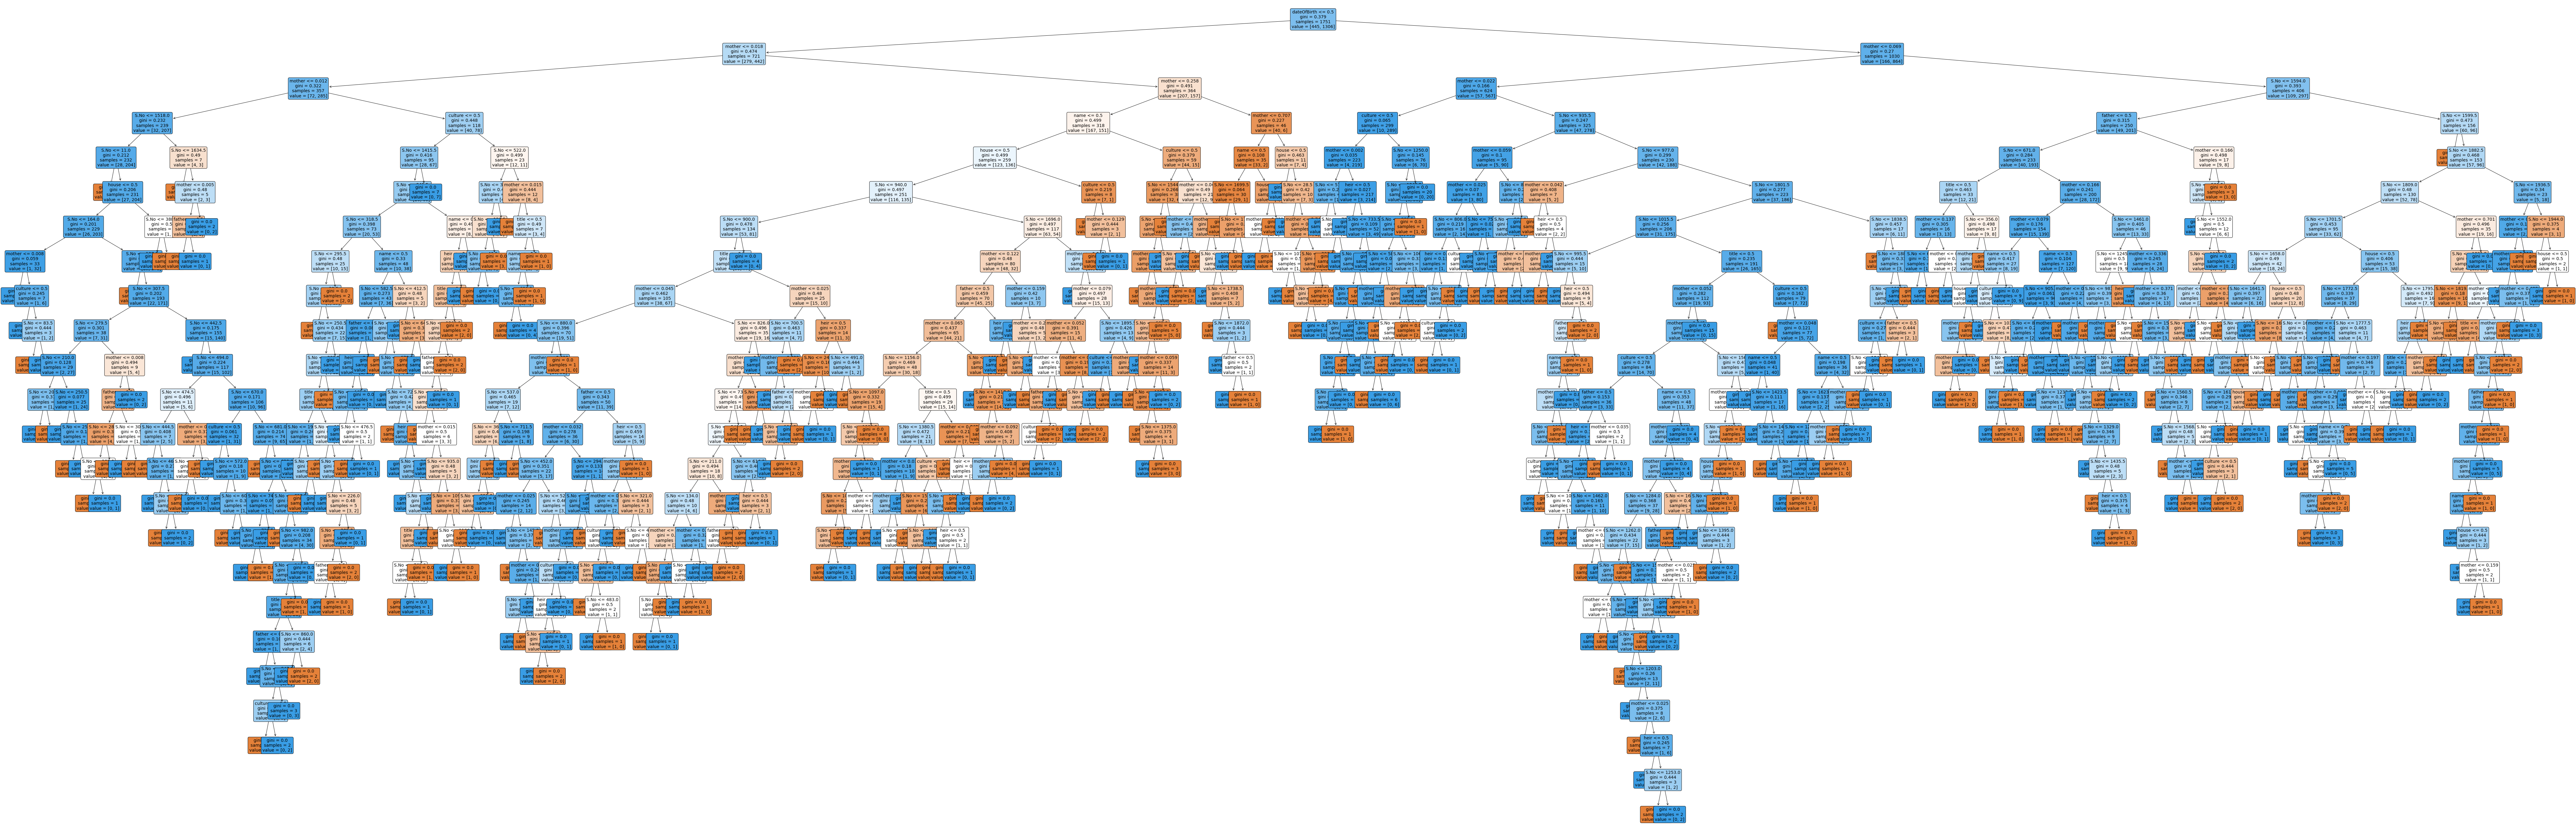

In [56]:
# setting figure size
plt.figure(figsize=(150,50))


# developing a plotted tree
plot_tree(decision_tree = full_tree_fit, 
          feature_names = got.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

## PRUNED TREE

In [57]:
# INSTANTIATING a classification tree object
tree_pruned = DecisionTreeClassifier(max_depth = 8,
                    min_samples_split = 35, #up to what we think, larger is better.
                    random_state = 219)   # this metrics help prevent the model to overfit


# FITTING the training data
tree_pruned_fit = tree_pruned.fit(x_train, y_train)


# PREDICTING on new data
tree_pruned_pred = tree_pruned_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', tree_pruned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_pruned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_pruned_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = tree_pruned_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = tree_pruned_fit.score(x_test, y_test).round(4) # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = tree_pruned_pred) # auc

Training ACCURACY: 0.8161
Testing  ACCURACY: 0.7949
AUC Score        : 0.7441


In [58]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_pruned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 32
False Positives: 18
False Negatives: 22
True Positives : 123



After layering the Tree, there is an evident improvement of the overffitng and the gap is much lower.
Thegraph bellow show the new tree that has been Pruned.

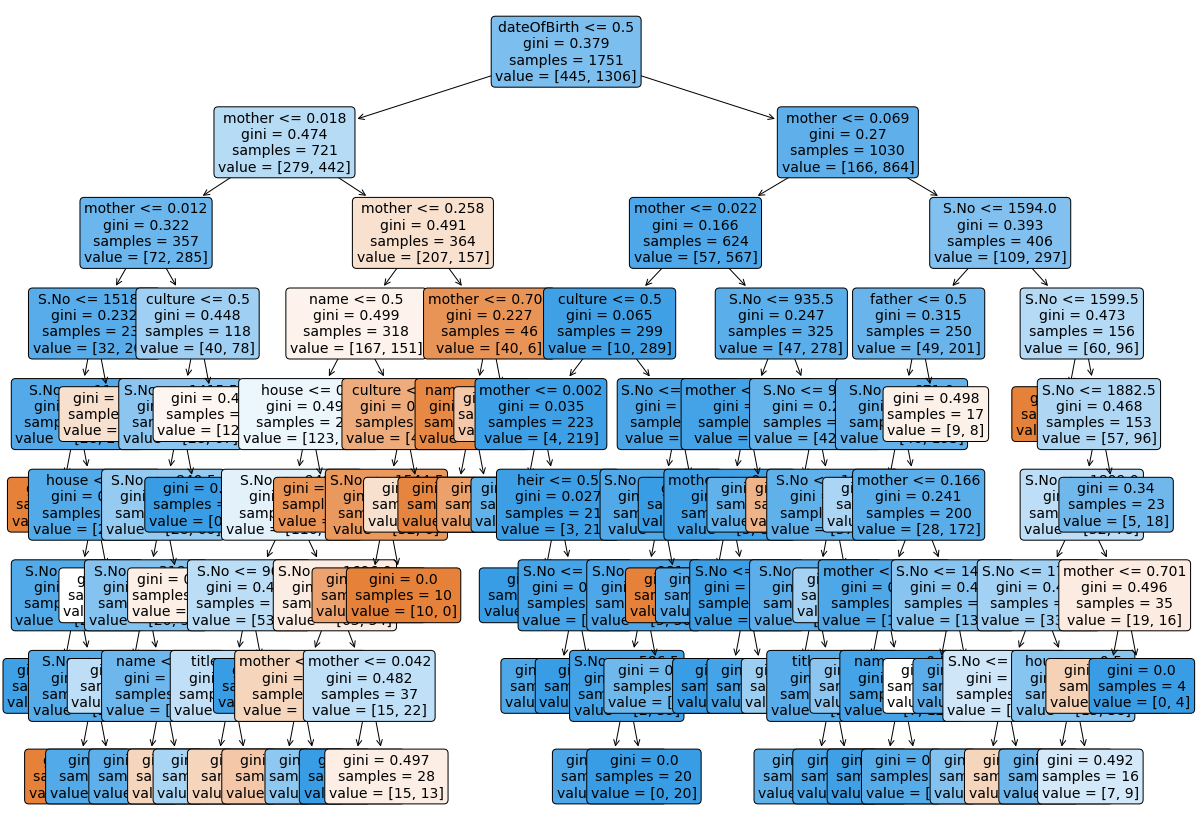

In [59]:
# setting figure size
plt.figure(figsize=(20, 15)) # adjusting to better fit the visual


# developing a plotted tree
plot_tree(decision_tree = tree_pruned_fit, # changing to pruned_tree_fit
          feature_names = got.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

After Prunning the tree we want to visualize what the pruned tree resulted in, and which variables seemed to have the best influence when splitting the data.

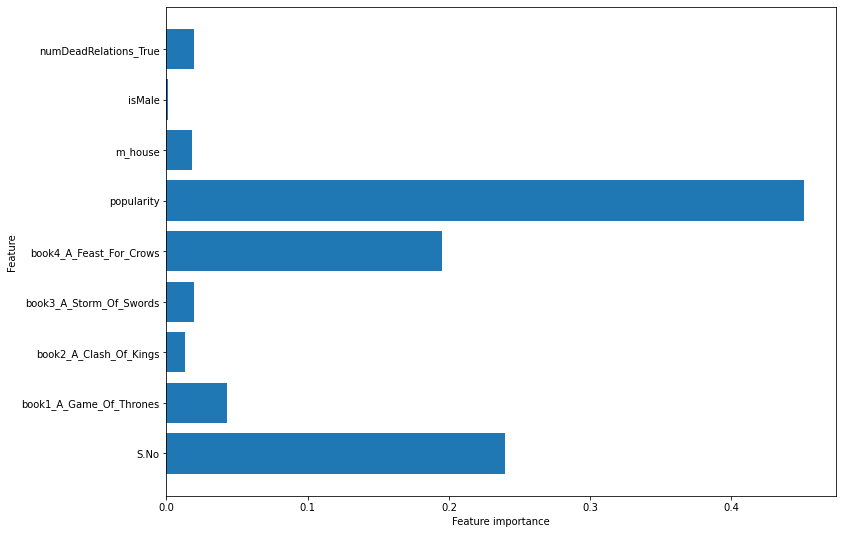

In [60]:
# plotting feature importance
plot_feature_importances(tree_pruned_fit,
                         train = x_train,
                         export = False)

## COMPARING RESULTS

In [61]:
# comparing results
print(f"""
Model         AUC Score\t\t\t TN, FP, FN, TP
-----         --------- \t\t--------------
Logistic      {logreg_auc_score}\t\t\t{logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Full Tree     {full_tree_auc_score}\t\t\t{full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree   {pruned_tree_auc_score}\t{pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Full Tree', 'Pruned Tree'],
           
    'AUC Score' : [logreg_auc_score, full_tree_auc_score, pruned_tree_auc_score],
    
    'Training Accuracy' : [logreg_train_score, full_tree_train_score,
                           pruned_tree_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, full_tree_test_score,
                           pruned_tree_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp)]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)




Model         AUC Score			 TN, FP, FN, TP
-----         --------- 		--------------
Logistic      0.7693			(29, 21, 6, 139)
Full Tree     0.6797			(29, 21, 32, 113)
Pruned Tree   0.7441379310344829	(32, 18, 22, 123)



Prunned tree is not performing better than Logistic regression, but has Definitely thrown some valuable insights about the variables that have the most importance over our target. It has also done a better job adjusting the confusion matrix balance.

# KNN MODEL

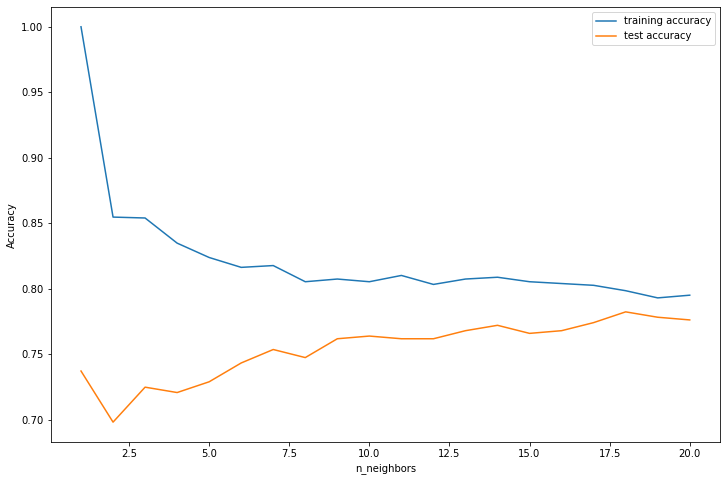

The optimal number of neighbors is: 18


In [62]:
# determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(x_data        = got_data,
                                  y_data        = got_target,
                                  response_type = 'class')

In [63]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(got_data)


# TRANSFORMING the data
x_scaled     = scaler.transform(got_data)


# converting to a DataFrame
x_scaled_df  = pd.DataFrame(x_scaled) 


# train-test split with the scaled data
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            x_scaled_df,
            got_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = got_target)


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)


# FITTING the training data
knn_fit = knn_opt.fit(x_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(x_test_scaled)


# SCORING the results
print('Training ACCURACY:', knn_fit.score(x_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(x_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))


# saving scoring data
knn_train_score = knn_fit.score(x_train_scaled, y_train_scaled).round(4)
knn_test_score  = knn_fit.score(x_test_scaled, y_test_scaled).round(4)


# saving AUC score
knn_auc_score   = roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4)

Training ACCURACY: 0.7898
Testing  ACCURACY: 0.8103
AUC Score        : 0.6628


Knn recommended using 18 nearest neighbors, as seen in the graph it denotes the point when the gap starts to shrink the most. But the AUC score is not better than previous models.  

In [64]:
# unpacking the confusion matrix
knn_tree_tn, \
knn_tree_fp, \
knn_tree_fn, \
knn_tree_tp = confusion_matrix(y_true = y_test, y_pred = knn_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")



True Negatives : 32
False Positives: 18
False Negatives: 22
True Positives : 123



# HYPERPARAMETER TUNNING

In [65]:
#Using preset parameters

########################################
# RandomizedSearchCV
########################################

# declaring a hyperparameter space
C_range          = np.arange(0.1, 5.0, 0.1)
warm_start_range = [True]
solver_range     = ['newton-cg','lbfgs']


# creating a hyperparameter grid
param_grid = {'C'          : C_range,
              'warm_start' : warm_start_range,
              'solver'     : solver_range}


# INSTANTIATING the model object without hyperparameters
lr_tuned = LogisticRegression(random_state = 219,
                              max_iter     = 1000) # increased for convergence


# GridSearchCV object
lr_tuned_cv = RandomizedSearchCV(estimator           = lr_tuned,   # the model object
                                 param_distributions = param_grid, # parameters to tune
                                 cv                  = 3,          # how many folds in cross-validation
                                 n_iter              = 250,        # number of combinations of hyperparameters to try
                                 random_state        = 219,        # starting point for random sequence
                                 scoring = make_scorer(
                                           roc_auc_score,
                                           needs_threshold = False)) # scoring criteria (AUC)


# FITTING to the FULL DATASET (due to cross-validation)
lr_tuned_cv.fit(got_data, got_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", lr_tuned_cv.best_params_)
print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 98 is smaller than n_iter=250. Running 98 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuned Parameters  : {'warm_start': True, 'solver': 'lbfgs', 'C': 3.2}
Tuned CV AUC      : 0.6


In [66]:
# checking the best estimator for the model
lr_tuned_cv.best_estimator_

LogisticRegression(C=3.2, max_iter=1000, random_state=219, warm_start=True)

**RESULTS:**

**Tuned Parameters  : {'warm_start': True, 'solver': 'lbfgs', 'C': 3.2}**

**Tuned CV AUC      : 0.6**



In [67]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
lr_tuned = LogisticRegression(C            = 3.2,
                              warm_start   = True,
                              solver       = 'lbfgs',
                              max_iter     = 1000,
                              random_state = 219)


# FITTING the model to the full dataset
lr_tuned.fit(got_data, got_target) # this is ok because already tuned


# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned.predict(x_test)


# SCORING the results
print('LR Tuned Training ACCURACY:', lr_tuned.score(x_train, y_train).round(4))
print('LR Tuned Testing  ACCURACY:', lr_tuned.score(x_test, y_test).round(4))
print('LR Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_tuned_pred).round(4))


# saving scoring data for future use
lr_tuned_train_score = lr_tuned.score(x_train, y_train).round(4) # accuracy
lr_tuned_test_score  = lr_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
lr_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = lr_tuned_pred).round(4) # auc

LR Tuned Training ACCURACY: 0.7676
LR Tuned Testing  ACCURACY: 0.8564
LR Tuned AUC Score        : 0.7593


In [68]:
# unpacking the confusion matrix
lr_tuned_tn, \
lr_tuned_fp, \
lr_tuned_fn, \
lr_tuned_tp = confusion_matrix(y_true = y_test, y_pred = lr_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {lr_tuned_tn}
False Positives: {lr_tuned_fp}
False Negatives: {lr_tuned_fn}
True Positives : {lr_tuned_tp}
""")


True Negatives : 28
False Positives: 22
False Negatives: 6
True Positives : 139



Using the hyperparameters resulting from the tunning, my AUC score improves significantly, but there is still high imbalance when evaluating the confussion matrix. So logistic regression simple or tunned are not working efficiently to achieve our objectives.

In [69]:
# declaring model performance objects
lr_train_acc = lr_tuned.score(x_train, y_train).round(4)
lr_test_acc  = lr_tuned.score(x_test, y_test).round(4)
lr_auc       = roc_auc_score(y_true  = y_test,
                             y_score = lr_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned LR',
                           'Training Accuracy' : lr_train_acc,
                           'Testing Accuracy'  : lr_test_acc,
                           'AUC Score'         : lr_auc,
                           'Confusion Matrix'  : (lr_tuned_tn,
                                                  lr_tuned_fp,
                                                  lr_tuned_fn,
                                                  lr_tuned_tp)},
                           ignore_index = True)


# checking the results
model_performance

Model Name  AUC Score  Training Accuracy  Testing Accuracy   Confusion Matrix
0     Logistic   0.769300             0.7676            0.8615   (29, 21, 6, 139)
1    Full Tree   0.679700             1.0000            0.7282  (29, 21, 32, 113)
2  Pruned Tree   0.744138             0.8161            0.7949  (32, 18, 22, 123)
3     Tuned LR   0.759300             0.7676            0.8564   (28, 22, 6, 139)

## HYPERPARAMETER TUNNING ON CLASSIFICATION TREES


In [70]:
#help(DecisionTreeClassifier)

In [71]:
#Using preset ranges

# declaring a hyperparameter space
criterion_range = ['gini', 'entropy']
splitter_range  = ['best', 'random']
depth_range     = np.arange(1, 20, 2)
leaf_range      = np.arange(1, 50, 2)


# creating a hyperparameter grid
param_grid = {'criterion'        : criterion_range,
              'splitter'         : splitter_range,
              'max_depth'        : depth_range,
              'min_samples_leaf' : leaf_range}


# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeClassifier(random_state = 219)


# RandomizedSearchCV object
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
                                   param_distributions   = param_grid,
                                   cv                    = 3,
                                   n_iter                = 1000,
                                   random_state          = 219,
                                   scoring = make_scorer(roc_auc_score,
                                             needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(got_data, got_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

Tuned Parameters  : {'splitter': 'random', 'min_samples_leaf': 15, 'max_depth': 5, 'criterion': 'entropy'}
Tuned Training AUC: 0.625


**RESULTS:**
**Tuned Parameters  : {'splitter': 'random', 'min_samples_leaf': 15, 'max_depth': 5, 'criterion': 'entropy'}**

**Tuned Training AUC: 0.625**

In [72]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
tree_tuned = DecisionTreeClassifier(splitter         = 'random',
                                    min_samples_leaf = 15,
                                    max_depth        = 5,
                                    criterion        = 'entropy',
                                    random_state     = 219)


# FITTING to the FULL DATASET (due to cross-validation)
tree_tuned_fit = tree_tuned.fit(got_data, got_target)


# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', tree_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_tuned.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(4))


# saving scoring data for future use
tree_tuned_train_score = tree_tuned.score(x_train, y_train).round(4) # accuracy
tree_tuned_test_score  = tree_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
tree_tuned_auc         = roc_auc_score(y_true  = y_test,
                                       y_score = tree_tuned_pred).round(4) # auc

Training ACCURACY: 0.7767
Testing  ACCURACY: 0.8667
AUC Score        : 0.7793


In [73]:
# unpacking the confusion matrix
tuned_tree_tn, \
tuned_tree_fp, \
tuned_tree_fn, \
tuned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_tree_tn}
False Positives: {tuned_tree_fp}
False Negatives: {tuned_tree_fn}
True Positives : {tuned_tree_tp}
""")


True Negatives : 30
False Positives: 20
False Negatives: 6
True Positives : 139



Tunned Tree continues to improve AUC, still there is room to improve imbalances in the confusion matrix.

In [74]:
# declaring model performance objects
tree_train_acc = tree_tuned.score(x_train, y_train).round(4)
tree_test_acc  = tree_tuned.score(x_test, y_test).round(4)
tree_auc       = roc_auc_score(y_true  = y_test,
                              y_score = tree_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned Tree',
                           'Training Accuracy' : tree_train_acc,
                           'Testing Accuracy'  : tree_test_acc,
                           'AUC Score'         : tree_auc,
                           'Confusion Matrix'  : (tuned_tree_tn,
                                                  tuned_tree_fp,
                                                  tuned_tree_fn,
                                                  tuned_tree_tp)},
                           ignore_index = True)


# checking the results
model_performance

Model Name  AUC Score  Training Accuracy  Testing Accuracy   Confusion Matrix
0     Logistic   0.769300             0.7676            0.8615   (29, 21, 6, 139)
1    Full Tree   0.679700             1.0000            0.7282  (29, 21, 32, 113)
2  Pruned Tree   0.744138             0.8161            0.7949  (32, 18, 22, 123)
3     Tuned LR   0.759300             0.7676            0.8564   (28, 22, 6, 139)
4   Tuned Tree   0.779300             0.7767            0.8667   (30, 20, 6, 139)

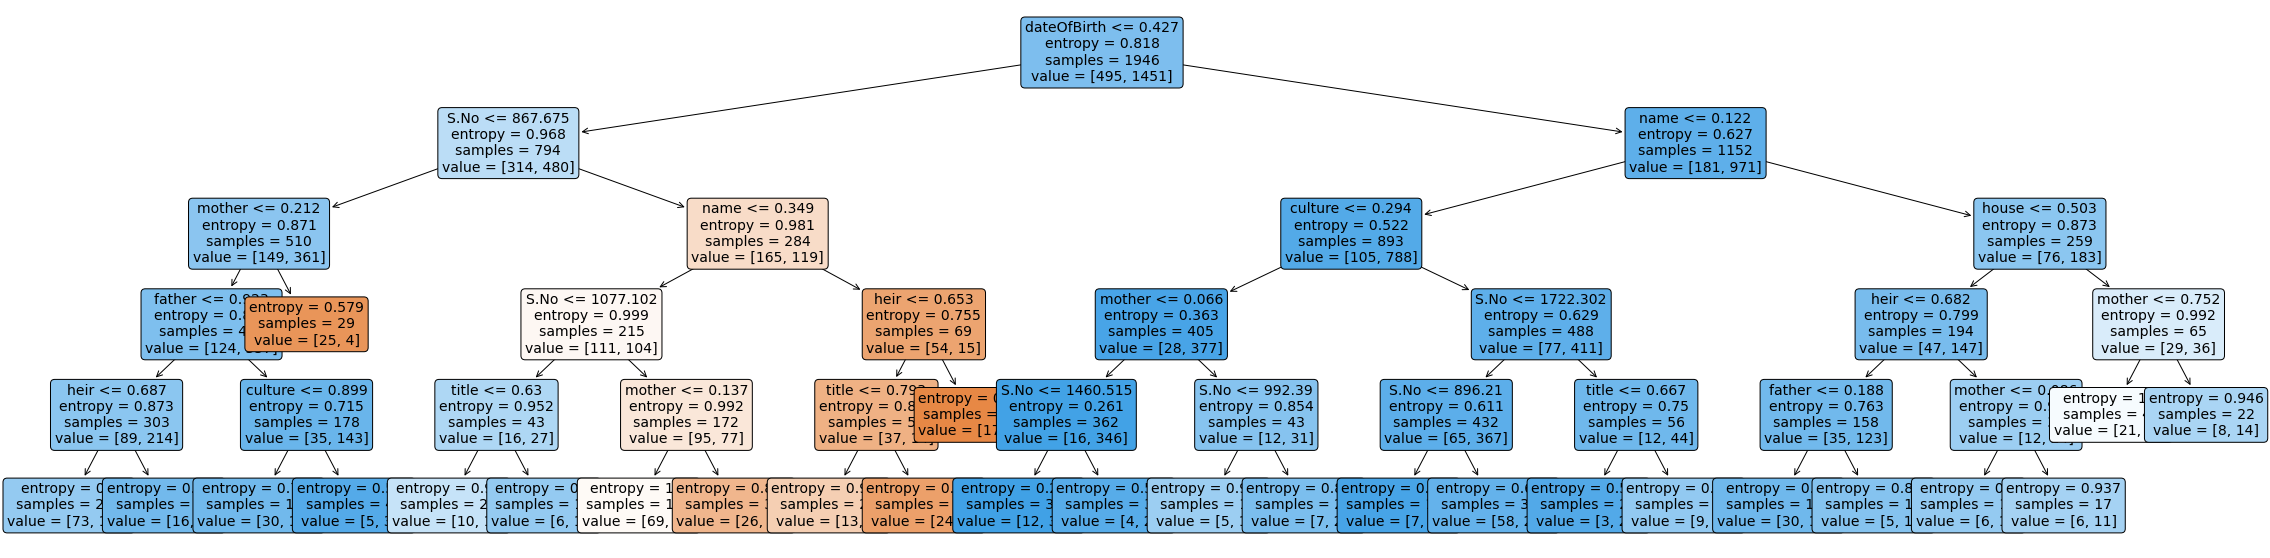

In [75]:
# setting figure size
plt.figure(figsize=(40, 10))


# developing a plotted tree
plot_tree(decision_tree = tree_tuned_fit, 
          feature_names = got.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

# RANDOM FOREST

In [76]:
# train/test split with the logit_full variables set
got_data   =  got.loc[ : , candidate_dict['logit_full']]
got_target =  got.loc[ : , 'isAlive']


# train/test split
x_train, x_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = got_target)

In [77]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = None,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

In [78]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(x_test, y_test).round(4))


# saving AUC score
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

Training ACCURACY: 1.0
Testing  ACCURACY: 0.8718
AUC Score        : 0.809


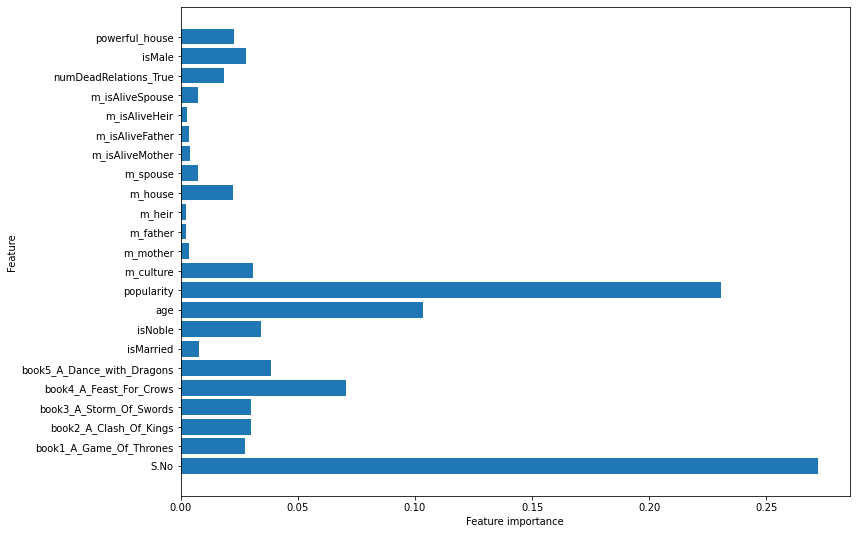

In [79]:
# plotting feature importances
plot_feature_importances(rf_default_fit,
                         train = x_train,
                         export = False)

In [80]:
# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")


True Negatives : 34
False Positives: 16
False Negatives: 9
True Positives : 136



This first forest is highly overfitted, we are going to use the randomized search to get the parameters that will work the best with our model.

**Randomized code will be Markdown to improve the speed to run the program**

In [81]:
# declaring model performance objects
rf_train_acc = rf_default_fit.score(x_train, y_train).round(4)
rf_test_acc  = rf_default_fit.score(x_test, y_test).round(4)
rf_auc       = roc_auc_score(y_true  = y_test,
                             y_score = rf_default_fit_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Random Forest (Full)',
                           'Training Accuracy'  : rf_train_acc,
                           'Testing Accuracy'   : rf_test_acc,
                           'AUC Score'          : rf_auc,
                           'Confusion Matrix'   : (rf_tn,
                                                   rf_fp,
                                                   rf_fn,
                                                   rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

Model Name  AUC Score  Training Accuracy  Testing Accuracy   Confusion Matrix
0              Logistic   0.769300             0.7676            0.8615   (29, 21, 6, 139)
1             Full Tree   0.679700             1.0000            0.7282  (29, 21, 32, 113)
2           Pruned Tree   0.744138             0.8161            0.7949  (32, 18, 22, 123)
3              Tuned LR   0.759300             0.7676            0.8564   (28, 22, 6, 139)
4            Tuned Tree   0.779300             0.7767            0.8667   (30, 20, 6, 139)
5  Random Forest (Full)   0.809000             1.0000            0.8718   (34, 16, 9, 136)

**Run the following code to tune the model's hyperparameters using RandomizedSearchCV.**

**Proof of code**



#FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


#PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


#declaring a hyperparameter space

estimator_range  = np.arange(50, 1000, 200) 

leaf_range       = np.arange(1, 25, 5)

criterion_range  = ['gini', 'entropy']

bootstrap_range  = [True, False]

warm_start_range = [True, False]

max_depth_range  =  np.arange(1,8,1)


#creating a hyperparameter grid
param_grid = {'n_estimators'     : estimator_range,
              'min_samples_leaf' : leaf_range,
              'criterion'        : criterion_range,
              'bootstrap'        : bootstrap_range,
              'warm_start'       : warm_start_range,
               'max_depth'       : max_depth_range}


#INSTANTIATING the model object without hyperparameters
forest_grid = RandomForestClassifier(random_state = 219)


#GridSearchCV object
forest_cv = RandomizedSearchCV(estimator           = forest_grid,
                               param_distributions = param_grid,
                               cv         = 3,
                               n_iter     = 1000,
                               scoring    = make_scorer(roc_auc_score,
                                            needs_threshold = False))

#FITTING to the FULL DATASET (due to cross-validation)
forest_cv.fit(got_data, got_target)


#PREDICT step is not needed


#printing the optimal parameters and best score
print("Tuned Parameters  :", forest_cv.best_params_)
print("Tuned Training AUC:", forest_cv.best_score_.round(4))

In [82]:
# best estimators based on RandomizedSearchCV
#forest_cv.best_estimator_

## MODEL BASED ON RESULTS

In [83]:
# building a model based on hyperparameter tuning results

# INSTANTIATING with best_estimator
forest_tuned = RandomForestClassifier(criterion        = 'gini',
                                      min_samples_leaf = 1,
                                      n_estimators     = 250,
                                      warm_start       = True,
                                      bootstrap        = False,
                                      random_state     = 219,
                                      max_depth        = 2)


# FITTING to the FULL DATASET (due to cross-validation)
forest_tuned_fit = forest_tuned.fit(got_data, got_target)


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned_fit.predict(x_test)


# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(x_train, y_train).round(4))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(x_test, y_test).round(4))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                                       y_score = forest_tuned_pred).round(4))


# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(x_train, y_train).round(4) # accuracy
forest_tuned_test_score  = forest_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred).round(4) # auc

Forest Tuned Training ACCURACY: 0.7613
Forest Tuned Testing  ACCURACY: 0.7538
Forest Tuned AUC Score        : 0.52


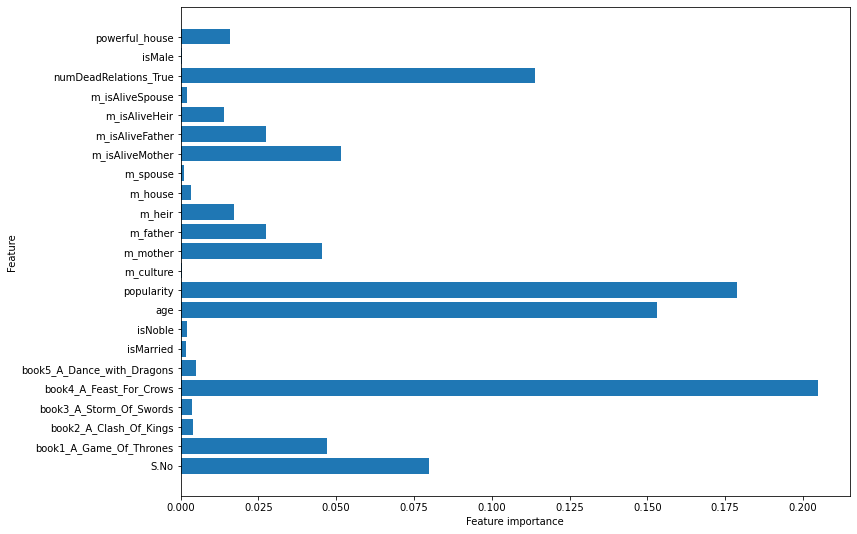

In [84]:
# plotting feature importances
plot_feature_importances(forest_tuned_fit,
                         train = x_train,
                         export = False)

In [85]:
# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")


True Negatives : 2
False Positives: 48
False Negatives: 0
True Positives : 145



Tunned random forest performed worst than most models up to this point. Even though it was able to minimize the gap between test and training it did not balanced the confusion matrix.

In [86]:
# declaring model performance objects
tuned_rf_train_acc = forest_tuned_fit.score(x_train, y_train).round(4)
tuned_rf_test_acc  = forest_tuned_fit.score(x_test, y_test).round(4)
tuned_rf_auc       = roc_auc_score(y_true  = y_test,
                                   y_score = forest_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Tuned Random Forest (Full)',
                           'Training Accuracy'  : tuned_rf_train_acc,
                           'Testing Accuracy'   : tuned_rf_test_acc,
                           'AUC Score'          : tuned_rf_auc,
                           'Confusion Matrix'   : (tuned_rf_tn,
                                                   tuned_rf_fp,
                                                   tuned_rf_fn,
                                                   tuned_rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

Model Name  AUC Score  Training Accuracy  Testing Accuracy   Confusion Matrix
0                    Logistic   0.769300             0.7676            0.8615   (29, 21, 6, 139)
1                   Full Tree   0.679700             1.0000            0.7282  (29, 21, 32, 113)
2                 Pruned Tree   0.744138             0.8161            0.7949  (32, 18, 22, 123)
3                    Tuned LR   0.759300             0.7676            0.8564   (28, 22, 6, 139)
4                  Tuned Tree   0.779300             0.7767            0.8667   (30, 20, 6, 139)
5        Random Forest (Full)   0.809000             1.0000            0.8718   (34, 16, 9, 136)
6  Tuned Random Forest (Full)   0.520000             0.7613            0.7538    (2, 48, 0, 145)

# GRADIENT BOOSTED MACHINE

In [87]:
# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 3,
                                              warm_start    = False,
                                              random_state  = 219)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(x_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(x_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))

Training ACCURACY: 0.8475
Testing ACCURACY : 0.8615
AUC Score        : 0.7693


In [88]:
# unpacking the confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, y_pred = full_gbm_default_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_default_tn}
False Positives: {gbm_default_fp}
False Negatives: {gbm_default_fn}
True Positives : {gbm_default_tp}
""")


True Negatives : 29
False Positives: 21
False Negatives: 6
True Positives : 139



GBM with default parameters reduced gap, and the scoring is good. Still highly imbalanced in the confusion matrix. As a final step, apply tunning to the parameters to improve the results.


In [89]:
# declaring model performance objects
gbm_train_acc = full_gbm_default_fit.score(x_train, y_train).round(4)
gbm_test_acc  = full_gbm_default_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = full_gbm_default_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'       : 'GBM (Full)',
                          'Training Accuracy' : gbm_train_acc,
                          'Testing Accuracy'  : gbm_test_acc,
                          'AUC Score'         : gbm_auc,
                          'Confusion Matrix'  : (gbm_default_tn,
                                                 gbm_default_fp,
                                                 gbm_default_fn,
                                                 gbm_default_tp)},
                          ignore_index = True)


# checking the results
model_performance

Model Name  AUC Score  Training Accuracy  Testing Accuracy   Confusion Matrix
0                    Logistic   0.769300             0.7676            0.8615   (29, 21, 6, 139)
1                   Full Tree   0.679700             1.0000            0.7282  (29, 21, 32, 113)
2                 Pruned Tree   0.744138             0.8161            0.7949  (32, 18, 22, 123)
3                    Tuned LR   0.759300             0.7676            0.8564   (28, 22, 6, 139)
4                  Tuned Tree   0.779300             0.7767            0.8667   (30, 20, 6, 139)
5        Random Forest (Full)   0.809000             1.0000            0.8718   (34, 16, 9, 136)
6  Tuned Random Forest (Full)   0.520000             0.7613            0.7538    (2, 48, 0, 145)
7                  GBM (Full)   0.769300             0.8475            0.8615   (29, 21, 6, 139)

## **Optimize the hyperparameters of a GBM model using the full datase**


#USING MY PARAMETERS


#declaring a hyperparameter space
learn_range        = np.arange(0.1, 2.2, 1)  #MY RANGES

estimator_range    = np.arange(100, 501, 200)  # MY RANGES

depth_range        = np.arange(1, 4, 1)

warm_start_range   = [True, False]

#creating a hyperparameter grid
param_grid = {'learning_rate' : learn_range,
              'max_depth'     : depth_range,
              'n_estimators'  : estimator_range,
              'warm_start'    : warm_start_range}


#INSTANTIATING the model object without hyperparameters
full_gbm_grid = GradientBoostingClassifier(random_state = 219)


#GridSearchCV object
full_gbm_cv = RandomizedSearchCV(estimator     = full_gbm_grid,
                           param_distributions = param_grid,
                           cv                  = 3,
                           n_iter              = 500,
                           random_state        = 219,
                           scoring             = make_scorer(roc_auc_score,
                                                 needs_threshold = False))


#FITTING to the FULL DATASET (due to cross-validation)
full_gbm_cv.fit(got_data, got_target)


#PREDICT step is not needed


#printing the optimal parameters and best score
print("Tuned Parameters  :", full_gbm_cv.best_params_)
print("Tuned Training AUC:", full_gbm_cv.best_score_.round(4))

In [90]:
# checking the best estimator for the model
#full_gbm_cv.best_estimator_

**TUNED PARAMETERS OUTPUT**

**Tuned Parameters  : {'warm_start': True, 'n_estimators': 300, 'max_depth': 1, 'learning_rate': 0.1}**

**Tuned Training AUC: 0.5211**

**GradientBoostingClassifier(max_depth=1, n_estimators=300, random_state=219,**
                           **warm_start=True)**

In [91]:
# INSTANTIATING with best_estimator (USE RESULTS FROM ABOVE)
gbm_tuned = GradientBoostingClassifier(learning_rate = 0.1,
                                       max_depth     = 1,
                                       n_estimators  = 300,
                                       warm_start    = True,
                                       random_state  = 219)


# FITTING to the FULL DATASET (due to cross-validation)
gbm_tuned_fit = gbm_tuned.fit(got_data, got_target)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', gbm_tuned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', gbm_tuned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred).round(4))

Training ACCURACY: 0.7995
Testing  ACCURACY: 0.8872
AUC Score        : 0.8193


In [92]:
# unpacking the confusion matrix
gbm_tuned_tn, \
gbm_tuned_fp, \
gbm_tuned_fn, \
gbm_tuned_tp = confusion_matrix(y_true = y_test, y_pred = gbm_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_tuned_tn}
False Positives: {gbm_tuned_fp}
False Negatives: {gbm_tuned_fn}
True Positives : {gbm_tuned_tp}
""")


True Negatives : 34
False Positives: 16
False Negatives: 6
True Positives : 139



The capacity of GBM of learning from previous iterations, and the penalty per row and not per column shows to be highly efficient and this is by far the best result. It did improved the AUC score and also reduced the imbalance in the confusion matrix, which is by far the best.

In [93]:
# declaring model performance objects
gbm_train_acc = gbm_tuned_fit.score(x_train, y_train).round(4)
gbm_test_acc  = gbm_tuned_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = gbm_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned GBM',
                          'Training Accuracy'  : gbm_train_acc,
                          'Testing Accuracy'   : gbm_test_acc,
                          'AUC Score'          : gbm_auc,
                          'Confusion Matrix'   : (gbm_tuned_tn,
                                                  gbm_tuned_fp,
                                                  gbm_tuned_fn,
                                                  gbm_tuned_tp)},
                          ignore_index = True)


# checking the results
model_performance

Model Name  AUC Score  Training Accuracy  Testing Accuracy   Confusion Matrix
0                    Logistic   0.769300             0.7676            0.8615   (29, 21, 6, 139)
1                   Full Tree   0.679700             1.0000            0.7282  (29, 21, 32, 113)
2                 Pruned Tree   0.744138             0.8161            0.7949  (32, 18, 22, 123)
3                    Tuned LR   0.759300             0.7676            0.8564   (28, 22, 6, 139)
4                  Tuned Tree   0.779300             0.7767            0.8667   (30, 20, 6, 139)
5        Random Forest (Full)   0.809000             1.0000            0.8718   (34, 16, 9, 136)
6  Tuned Random Forest (Full)   0.520000             0.7613            0.7538    (2, 48, 0, 145)
7                  GBM (Full)   0.769300             0.8475            0.8615   (29, 21, 6, 139)
8                   Tuned GBM   0.819300             0.7995            0.8872   (34, 16, 6, 139)

## Sorting the Results

In [94]:
model_performance.sort_values(by = 'AUC Score',
                              ascending = False)

Model Name  AUC Score  Training Accuracy  Testing Accuracy   Confusion Matrix
8                   Tuned GBM   0.819300             0.7995            0.8872   (34, 16, 6, 139)
5        Random Forest (Full)   0.809000             1.0000            0.8718   (34, 16, 9, 136)
4                  Tuned Tree   0.779300             0.7767            0.8667   (30, 20, 6, 139)
0                    Logistic   0.769300             0.7676            0.8615   (29, 21, 6, 139)
7                  GBM (Full)   0.769300             0.8475            0.8615   (29, 21, 6, 139)
3                    Tuned LR   0.759300             0.7676            0.8564   (28, 22, 6, 139)
2                 Pruned Tree   0.744138             0.8161            0.7949  (32, 18, 22, 123)
1                   Full Tree   0.679700             1.0000            0.7282  (29, 21, 32, 113)
6  Tuned Random Forest (Full)   0.520000             0.7613            0.7538    (2, 48, 0, 145)

# RESULTS

In [95]:
# comparing results

print(f"""
     Model          AUC        Training     Testing       Confusion Matrix
                   Score       Accuracy     Accuracy      (TN, FP, FN, TP)
--------------   ----------   ----------   ----------   --------------------
1. Logistic        {model_performance['AUC Score'][0]}      {model_performance['Training Accuracy'][0]}       {model_performance['Testing Accuracy'][0]}     {model_performance['Confusion Matrix'][0]}
2. Tunned LR       {model_performance['AUC Score'][3]}      {model_performance['Training Accuracy'][3]}      {model_performance['Testing Accuracy'][3]}     {model_performance['Confusion Matrix'][3]}
3. Pruned Tree     {model_performance['AUC Score'][2]}      {model_performance['Training Accuracy'][2]}      {model_performance['Testing Accuracy'][2]}    {model_performance['Confusion Matrix'][2]}
4. Full Tree       {model_performance['AUC Score'][1]}       {model_performance['Training Accuracy'][1]}       {model_performance['Testing Accuracy'][1]}       {model_performance['Confusion Matrix'][1]}
5. Tunned Tree     {model_performance['AUC Score'][4]}       {model_performance['Training Accuracy'][4]}       {model_performance['Testing Accuracy'][4]}       {model_performance['Confusion Matrix'][4]}
6. Random Forest   {model_performance['AUC Score'][5]}       {model_performance['Training Accuracy'][5]}       {model_performance['Testing Accuracy'][5]}       {model_performance['Confusion Matrix'][5]}
   (Full)
7. Tuned Random    {model_performance['AUC Score'][6]}       {model_performance['Training Accuracy'][6]}        {model_performance['Testing Accuracy'][6]}       {model_performance['Confusion Matrix'][6]}
    Forest (Full)    
8. GBM (Full)      {model_performance['AUC Score'][7]}       {model_performance['Training Accuracy'][7]}       {model_performance['Testing Accuracy'][7]}       {model_performance['Confusion Matrix'][7]}
9. Tuned GBM*      {model_performance['AUC Score'][8]}       {model_performance['Training Accuracy'][8]}       {model_performance['Testing Accuracy'][8]}       {model_performance['Confusion Matrix'][8]}
* Final Model
""")


     Model          AUC        Training     Testing       Confusion Matrix
                   Score       Accuracy     Accuracy      (TN, FP, FN, TP)
--------------   ----------   ----------   ----------   --------------------
1. Logistic        0.7693      0.7676       0.8615     (29, 21, 6, 139)
2. Tunned LR       0.7593      0.7676      0.8564     (28, 22, 6, 139)
3. Pruned Tree     0.7441379310344829      0.8161      0.7949    (32, 18, 22, 123)
4. Full Tree       0.6797       1.0       0.7282       (29, 21, 32, 113)
5. Tunned Tree     0.7793       0.7767       0.8667       (30, 20, 6, 139)
6. Random Forest   0.809       1.0       0.8718       (34, 16, 9, 136)
   (Full)
7. Tuned Random    0.52       0.7613        0.7538       (2, 48, 0, 145)
    Forest (Full)    
8. GBM (Full)      0.7693       0.8475       0.8615       (29, 21, 6, 139)
9. Tuned GBM*      0.8193       0.7995       0.8872       (34, 16, 6, 139)
* Final Model



All models suggested different levels of performance, but overall GBM TUNNED is my chosen model with 0.81 AUC score and the best overall balance between false positives and false negatives.

False negatives will represent the characters that were predicted as not alive when they WERE alive.

And the False positives are those characters predicted as is Alive that WERE NOT alive.